<a href="https://colab.research.google.com/github/diego51alejo/Sentiment_Analysis/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**

Classification of books reviews, the first step is a binary classification(positive or negative), the second step is multiclass classification, contain four grades (1,2,4,5).


DataSet Amazon [link data](https://www.cs.jhu.edu/~mdredze/datasets/sentiment/)




## Binary Classification

### Data Load

In [162]:
#Conection drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [163]:
%cd '/content/drive/My Drive/Colab Notebooks/NLTK'

/content/drive/My Drive/Colab Notebooks/NLTK


In [164]:
import tarfile

file = tarfile.open('processed_acl.tar.gz')
file.extractall('./data_reviews')
file.close()

In [165]:
negative_file = open('data_reviews/processed_acl/books/negative.review', 'r').read()
positive_file = open('data_reviews/processed_acl/books/positive.review', 'r').read()

### Select features

In [166]:
import pandas as pd
import nltk
import random
import numpy as np

In [167]:
tokens = []

for review in negative_file.split('\n'):
  for list_words in review.split(' ') : 
    for w in list_words.split(' '):
      word= w.split(':')
      tokens.append(word[0])
      
for review in positive_file.split('\n'):
  
  for list_words in review.split(' ') : 
    for w in list_words.split(' '):
      word= w.split(':')
      tokens.append(word[0])

In [168]:
all_words = nltk.FreqDist(tokens)

In [169]:
top_words = [w for w in set(tokens) if all_words[w]>50]

In [170]:
sentences = []
labels = []

for review in negative_file.split('#label#:negative\n'):
  list_sentences = {w_c.split(':')[0]: int(w_c.split(':')[1]) for w_c in review.split(' ') if len(w_c.split(':'))==2}
  list_review = []
  for word in  top_words:
    if word in list_sentences.keys():
      list_review.append(list_sentences[word])
    else:
      list_review.append(0)

  sentences.append(list_review)
  labels.append('negative')

for review in positive_file.split('#label#:positive\n'):
  list_sentences = {w_c.split(':')[0]: int(w_c.split(':')[1]) for w_c in review.split(' ') if len(w_c.split(':'))==2}
  list_review = []
  for word in  top_words:
    if word in list_sentences.keys():
      list_review.append(list_sentences[word])
    else:
      list_review.append(0)

  sentences.append(list_review)
  labels.append('positive')


sentences = np.array(sentences)


In [171]:
sentences.shape

(2002, 813)

### Train and Evaluate model

In [184]:
from sklearn.model_selection import cross_val_score

In [172]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)

In [182]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=250, criterion='entropy').fit(x_train, y_train)
scores = cross_val_score(classifier, x_test, y_test, cv=5)
scores

array([0.79012346, 0.7375    , 0.7125    , 0.675     , 0.7625    ])

In [178]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(x_train, y_train)
gnb.score(x_test, y_test)
scores = cross_val_score(gnb, x_test, y_test, cv=5)
scores

array([0.60493827, 0.6125    , 0.55      , 0.625     , 0.675     ])

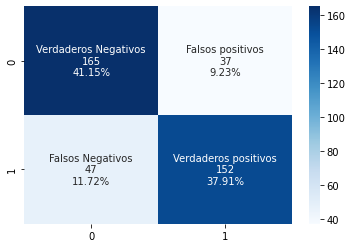

In [183]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, classifier.predict(x_test))
group_names = ['Verdaderos Negativos','Falsos positivos','Falsos Negativos','Verdaderos positivos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels,fmt='', cmap='Blues')

## Multiclass Classification

### Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/NLTK'

/content/drive/My Drive/Colab Notebooks/NLTK


In [ ]:
test = open('processed_stars/books/test', 'r').read()
train = open('processed_stars/books/train', 'r').read()

### Select features

In [ ]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk import bigrams, ngrams
import random
import numpy as np

In [ ]:
vocab = []

for review in train.split('\n'):
  for word_count in review.split(' '):
    word = word_count.split(':')[0]
    vocab.append(word)

In [ ]:
words_FreqDist = FreqDist(vocab) 
top_words = [w for w in set(vocab) if words_FreqDist[w] > 120]

In [ ]:
all_bigrams = bigrams(vocab)
freq_bigrams = FreqDist(all_bigrams)
top_bigrams = [w for w in set(bigrams(vocab)) if freq_bigrams[w] > 15]

In [ ]:
all_trigrams = ngrams(vocab,3)
freq_trigrams = FreqDist(all_trigrams)
top_trigrams = [w for w in set(ngrams(vocab,3)) if freq_trigrams[w] > 8]

In [ ]:
vectors_train = []
labels_train = []

for review in train.split('\n'):
  vector = []
  list_sentences = {w_c.split(':')[0]: float(w_c.split(':')[1]) for w_c in review.split(' ') if len(w_c.split(':'))==2}
  label = review.split(' ')[-1]
  labels_train.append(label)
  for word in top_words:
    if word in list_sentences.keys():
      vector.append(list_sentences[word])
    else:
      vector.append(0)
  
  
  vocab_review = []

  for freqword in review.split(' '):
    if len(freqword.split(':'))==2:
      freqword_split = freqword.split(':')
      word = freqword[0]
      vocab_review.append(word)
  
  freq_bigrams_review = FreqDist(vocab_review)
  for bigram in top_bigrams:
    if bigram in freq_bigrams_review.keys():
      vector.append(freq_bigrams_review[bigram])
    else:
      vector.append(0)

  freq_trigrams_review = FreqDist(vocab_review)
  for trigram in top_trigrams:
    if trigram in freq_trigrams_review.keys():
      vector.append(freq_trigrams_review[trigram])
    else:
      vector.append(0) 
        
  vectors_train.append(vector)
  

vectors_test = []
labels_test = []

for review in test.split('\n'):
  vector = []
  list_sentences = {w_c.split(':')[0]: float(w_c.split(':')[1]) for w_c in review.split(' ') if len(w_c.split(':'))==2}
  label = review.split(' ')[-1]
  labels_test.append(label)
  for word in top_words:
    if word in list_sentences.keys():
      vector.append(list_sentences[word])
    else:
      vector.append(0)


  vocab_review = []

  for freqword in review.split(' '):
    if len(freqword.split(':'))==2:
      freqword_split = freqword.split(':')
      word = freqword[0]
      vocab_review.append(word)
  
  freq_bigrams_review = FreqDist(vocab_review)
  for bigram in top_bigrams:
    if bigram in freq_bigrams_review.keys():
      vector.append(freq_bigrams_review[bigram])
    else:
      vector.append(0)  

  freq_trigrams_review = FreqDist(vocab_review)
  for trigram in top_trigrams:
    if trigram in freq_trigrams_review.keys():
      vector.append(freq_trigrams_review[trigram])
    else:
      vector.append(0)     
        
  vectors_test.append(vector)

In [ ]:
vectors_test.pop()
labels_test.pop()
vectors_train.pop()
labels_train.pop()

vectors_train = np.array(vectors_train)
vectors_test = np.array(vectors_test)

In [ ]:
label_train = []
label_test = []

for grade in labels_train:
  label_train.append(float(grade.split(':')[-1]))

for grade in labels_test:
  label_test.append(float(grade.split(':')[-1]))

### Train and Evaluate model

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150, criterion='entropy').fit(vectors_train, label_train)
scores = cross_val_score(classifier, vectors_train, label_train, cv=5)
scores

array([0.92307692, 0.91818182, 0.91818182, 0.96818182, 0.95909091])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4).fit(vectors_train, label_train)
scores = cross_val_score(neigh, vectors_train, label_train, cv=5)
scores

array([0.47058824, 0.52272727, 0.46363636, 0.47272727, 0.54545455])

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(vectors_train, label_train)
gnb.score(vectors_test, label_test)
scores = cross_val_score(gnb, vectors_train, label_train, cv=5)
scores

array([1., 1., 1., 1., 1.])

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(vectors_train, label_train)
bnb.score(vectors_test, label_test)

0.3704545454545455

In [ ]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB().fit(vectors_train, label_train)
cnb.score(vectors_test, label_test)

0.4781818181818182

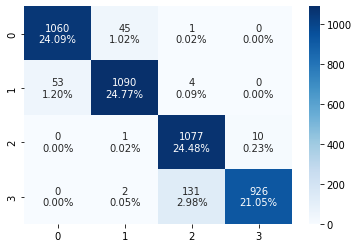

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(label_test, classifier.predict(vectors_test))

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(4,4)
sns.heatmap(cm, annot=labels,fmt='', cmap='Blues')